In [ ]:
#Üzerinde çalışılan veri seti finansal anlamda verilerden oluşmaktadır.
#Veri seti, 3576 adet yeni konut hisse senedi kredisi için mevcut durum ve kredi performans bilgilerini içerir.
Bir konut özkaynak kredisi, borçlunun evinin özkaynağını dayanak teminat olarak kullandığı bir kredidir. Hedef (BAD),
bir başvuranın nihayetinde temerrüde düştüğünü veya ciddi şekilde suçlu olup olmadığını gösteren ikili bir değişkendir. 
#13 adet değişken içerir ve bunların 2 tanesi kategorik,11 tanesi numerik değişkenlerdir.


In [ ]:
BAD : 1 = client defaulted on loan 0 = loan repaidbad = 1 #1:borcu ödememe durumu , 0: borcu ödeme durumu
LOAN : Amount of the loan request    #loan:talep edilen kredinin miktarı
MORTDUE : Amount due on existing mortgage  #Mortdue:Morgage borçları
VALUE : Value of current property       #value: bulunan mal değeri
REASON : DebtCon = debt consolidation HomeImp = home improvement  #reason:kısa süreli borçların uzun süreli ya da süresiz borca dönüştürülmesi.
JOB : Six occupational categories  #job:meslek
YOJ : Years at present job   #yoj:meslekte çalışılan yıl
DEROG : Number of major derogatory reports #uygunsuz davranis raporlarinin sayısı
DELINQ : Number of delinquent credit lines #ödenmemiş kredi limiti sayısı
CLAGE : Age of oldest trade line in months #aylarin icerisindeki en eski kredi limitinin yaş durumu
NINQ : Number of recent credit lines #güncel kredi sorgusu
CLNO : Number of credit lines #kredi limitinin sayısı
DEBTINC : Debt-to-income ratio #borç-gelir oranı

In [ ]:
Amaç: Belirli bir kredi başvurusunun kredi geri ödemesini geciktirme 
şansını tahmin eden bir kredi puanlama algoritması oluşturmaktır.

In [1]:
import os
os.getcwd()

'C:\\Users\\DELL®\xad\\Desktop\\Kodluyoruz'

In [2]:
import pandas as pd
import numpy as np 

In [8]:
class Info(): 
    def __init__(self,data):
        data = pd.read_csv("bankdata.csv")
        print(data.head())
        print(data.info())
        print(data.describe().T)
        print(data.shape)
        print(data.columns)

In [10]:
data = pd.read_csv("bankdata.csv")

In [11]:
Info(data)  #veri hakkında genel bilgilerin verildiği bölüm

   bad   loan   mortdue     value   reason  job   yoj  derog  delinq   clage  \
0    0  81200   18834.0  108355.0  HomeImp  NaN  28.0    0.0     0.0  139.14   
1    0  12600  103960.0  127384.0  DebtCon  NaN   2.0    0.0     0.0  129.02   
2    0  18000   46865.0   61266.0  DebtCon  NaN   5.0    0.0     0.0  102.59   
3    0  10300   57676.0   71027.0  DebtCon  NaN  19.0    0.0     0.0  157.52   
4    0   9400   56508.0   78358.0  DebtCon  NaN  17.0    0.0     0.0  141.93   

   ninq  clno  debtinc  
0   0.0  14.0   34.042  
1   0.0  25.0   34.479  
2   2.0   9.0   26.354  
3   1.0  11.0   33.992  
4   0.0  11.0   32.327  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   bad      3576 non-null   int64  
 1   loan     3576 non-null   int64  
 2   mortdue  3262 non-null   float64
 3   value    3512 non-null   float64
 4   reason   3429 non-null   obje

In [12]:
data.isnull().sum() #verideki nan değerlerinin sayısını gördük.

bad          0
loan         0
mortdue    314
value       64
reason     147
job        167
yoj        312
derog      427
delinq     351
clage      179
ninq       303
clno       133
debtinc    767
dtype: int64

In [13]:
data["reason"].fillna(value = "DebtCon",inplace = True) #reasondaki nan değerler debtcon olarak değiştirdim.
data["job"].fillna(value = "Other",inplace = True)

data["derog"].fillna(value=0,inplace=True)
data["delinq"].fillna(value=0,inplace=True)

data.fillna(value=data.mean(),inplace=True) #Her sınıfın ortalamasını kullanarak değiştirdim.

In [14]:
data.isnull().sum() #Üstteki değerleri eşitledik ve nan değerlere yeni değer atadım. Artık boş değerim yok.

bad        0
loan       0
mortdue    0
value      0
reason     0
job        0
yoj        0
derog      0
delinq     0
clage      0
ninq       0
clno       0
debtinc    0
dtype: int64

In [50]:
description= data.describe(include='all')

In [94]:
print(data.min()) #verideki değerlerin min halini bulduk.

bad                  0.00
loan              1100.00
mortdue           2619.00
value             8800.00
yoj                  0.00
derog                0.00
delinq               0.00
clage                0.49
ninq                 0.00
clno                 0.00
debtinc              0.72
reason_DebtCon       0.00
reason_HomeImp       0.00
job_Mgr              0.00
job_Office           0.00
job_Other            0.00
job_ProfEx           0.00
job_Sales            0.00
job_Self             0.00
dtype: float64


In [95]:
print(data.max()) #verideki değerlerin max halini bulduk.

bad                    1.000
loan               89900.000
mortdue           399550.000
value             850000.000
yoj                   41.000
derog                 10.000
delinq                15.000
clage               1168.230
ninq                  17.000
clno                  71.000
debtinc              203.312
reason_DebtCon         1.000
reason_HomeImp         1.000
job_Mgr                1.000
job_Office             1.000
job_Other              1.000
job_ProfEx             1.000
job_Sales              1.000
job_Self               1.000
dtype: float64


In [96]:
print(data.std()) #verilerin standart sapmasını bulduk.

bad                   0.399594
loan              11262.834060
mortdue           42039.367757
value             54371.955751
yoj                   7.230266
derog                 0.816290
delinq                1.051780
clage                84.858509
ninq                  1.653842
clno                  9.976568
debtinc               8.031132
reason_DebtCon        0.456493
reason_HomeImp        0.456493
job_Mgr               0.335153
job_Office            0.365836
job_Other             0.497239
job_ProfEx            0.410522
job_Sales             0.134614
job_Self              0.176446
dtype: float64


In [51]:
data.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,Other,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,Other,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,Other,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,Other,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,Other,17.0,0.0,0.0,141.93,0.0,11.0,32.327


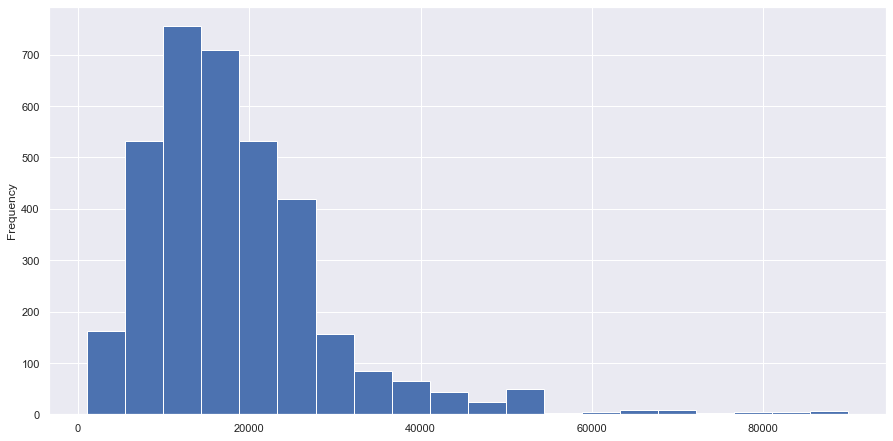

In [85]:
data["loan"].plot.hist(bins = 20,figsize=(15,7.5)) #loan ve diğer değişkenlerin sırasıyla histogramını çizdirdik.

#kredi değişkeninin dağılımını görüyoruz.
#10000-30000 arasında yoğunluk yüksektir.

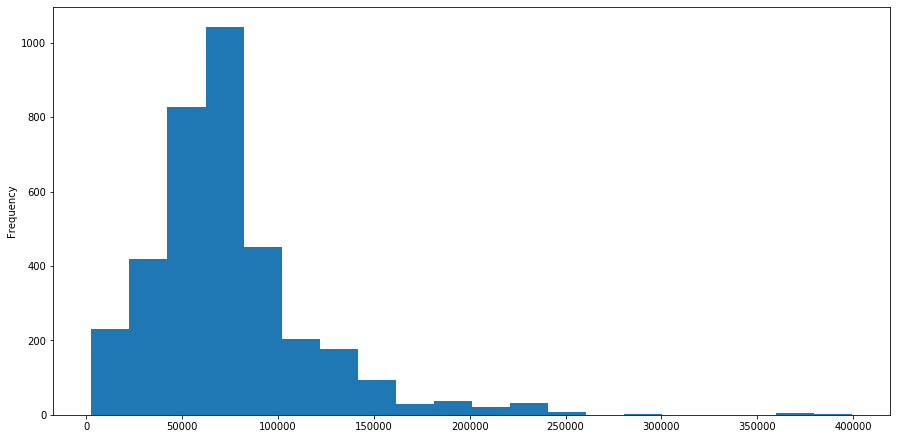

In [17]:
data["mortdue"].plot.hist(bins = 20,figsize=(15,7.5))

#mortdue değişkeninin dağılımını görüyoruz.
#Konsantrasyon 10000-500000 civarında yüksek


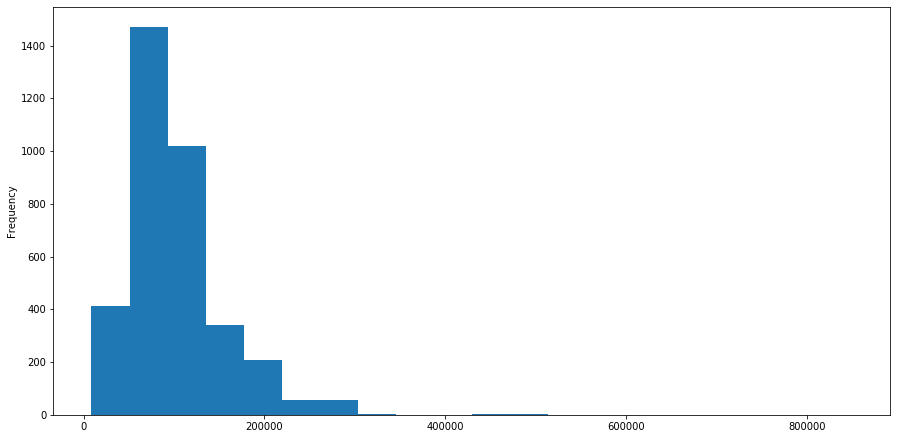

In [18]:
data["value"].plot.hist(bins = 20,figsize=(15,7.5))

#Konsantrasyon 5000-25000 civarında yüksek
# Sonunda ortalamaya göre biraz yüksek olan (> = 400000) çok daha az değer vardır. Bunları kapatabiliriz.

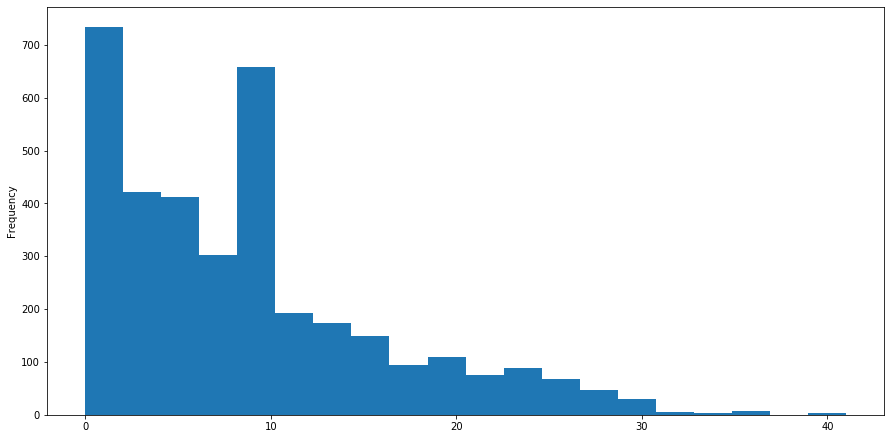

In [19]:
data["yoj"].plot.hist(bins = 20,figsize=(15,7.5))

#Ortalama 0-300000 civarında fazladır.

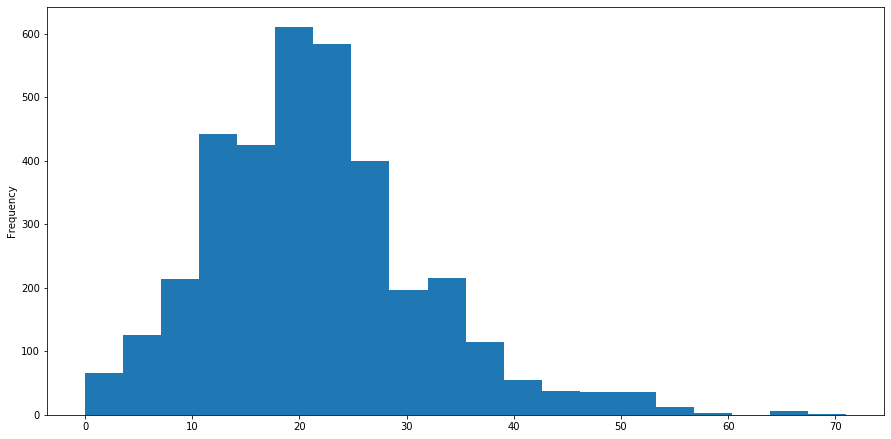

In [20]:
data["clno"].plot.hist(bins = 20,figsize=(15,7.5))

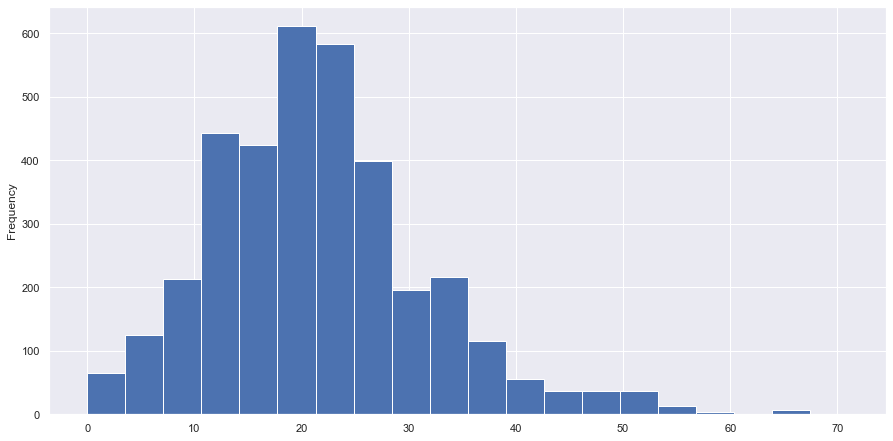

In [89]:
data["clno"].plot.hist(bins = 20,figsize=(15,7.5))


In [56]:
MissingData=data.isnull().sum().rename_axis('Variables').reset_index(name='Missing Values') 
MissingData  # the isnull() returns 1 if the value is null

,Variables,Missing Values
0,bad,0
1,loan,0
2,mortdue,0
3,value,0
4,reason,0
5,job,0
6,yoj,0
7,derog,0
8,delinq,0
9,clage,0


In [57]:
#dropping rows that have missing data
data.dropna(axis=0, how='any', inplace=True)
data #NaN değerlerin göz ardı edilmesi

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.000000,108355.000000,HomeImp,Other,28.000000,0.0,0.0,139.14,0.0,14.0,34.042000
1,0,12600,103960.000000,127384.000000,DebtCon,Other,2.000000,0.0,0.0,129.02,0.0,25.0,34.479000
2,0,18000,46865.000000,61266.000000,DebtCon,Other,5.000000,0.0,0.0,102.59,2.0,9.0,26.354000
3,0,10300,57676.000000,71027.000000,DebtCon,Other,19.000000,0.0,0.0,157.52,1.0,11.0,33.992000
4,0,9400,56508.000000,78358.000000,DebtCon,Other,17.000000,0.0,0.0,141.93,0.0,11.0,32.327000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3571,1,8400,31800.000000,72000.000000,DebtCon,Self,8.832644,0.0,2.0,187.27,1.0,21.0,33.831737
3572,1,21600,154991.000000,101076.922759,DebtCon,Self,8.832644,2.0,4.0,165.60,0.0,43.0,38.015000
3573,1,24000,35000.000000,101076.922759,DebtCon,Self,3.000000,1.0,0.0,177.50,0.0,16.0,33.831737
3574,1,10000,74013.907992,25010.000000,HomeImp,Self,5.000000,0.0,3.0,326.13,4.0,17.0,33.831737


In [53]:
y = data.bad    #değişkenlerin değerlerini saydırdık.
y = y.astype(object) 
count = pd.crosstab(index = y, columns="count")
percentage = pd.crosstab(index = y, columns="frequency")/pd.crosstab(index = y, columns="frequency").sum()
pd.concat([count, percentage], axis=1)

col_0,count,frequency
bad,,
0,2863,0.800615
1,713,0.199385


In [54]:
categorical_cols = [cname for cname in data.columns if
                    data[cname].dtype in ['object']]
cat = data[categorical_cols]
cat.columns

Index(['reason', 'job'], dtype='object')

In [7]:
import pandas as pd
from pandas import Series, DataFrame
data=pd.read_csv("bankdata.csv")
data=data.copy()
data=data.dropna()

In [9]:
pd.crosstab(data["bad"], data["job"],normalize='index').style.background_gradient(cmap="summer_r")

job,Mgr,Office,Other,ProfEx,Sales,Self
bad,,,,,,
0,0.131522,0.177174,0.377174,0.273913,0.012500,0.027717
1,0.151685,0.123596,0.449438,0.196629,0.039326,0.039326


In [10]:
pd.crosstab(data["bad"], data["job"],normalize='columns').style.background_gradient(cmap="summer_r")

job,Mgr,Office,Other,ProfEx,Sales,Self
bad,,,,,,
0,0.899628,0.936782,0.896641,0.935065,0.766667,0.879310
1,0.100372,0.063218,0.103359,0.064935,0.233333,0.120690


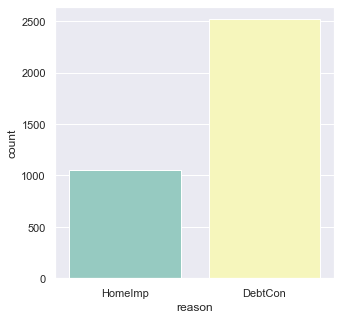

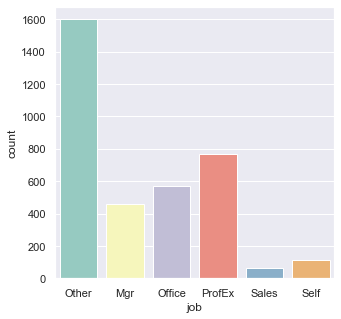

In [49]:
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set( rc = {'figure.figsize': (5, 5)})
fcat = ['reason','job']

for col in fcat:
    plt.figure()
    sns.countplot(x = cat[col], data= cat, palette="Set3")
    plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C896D9D848>,
      dtype=object)

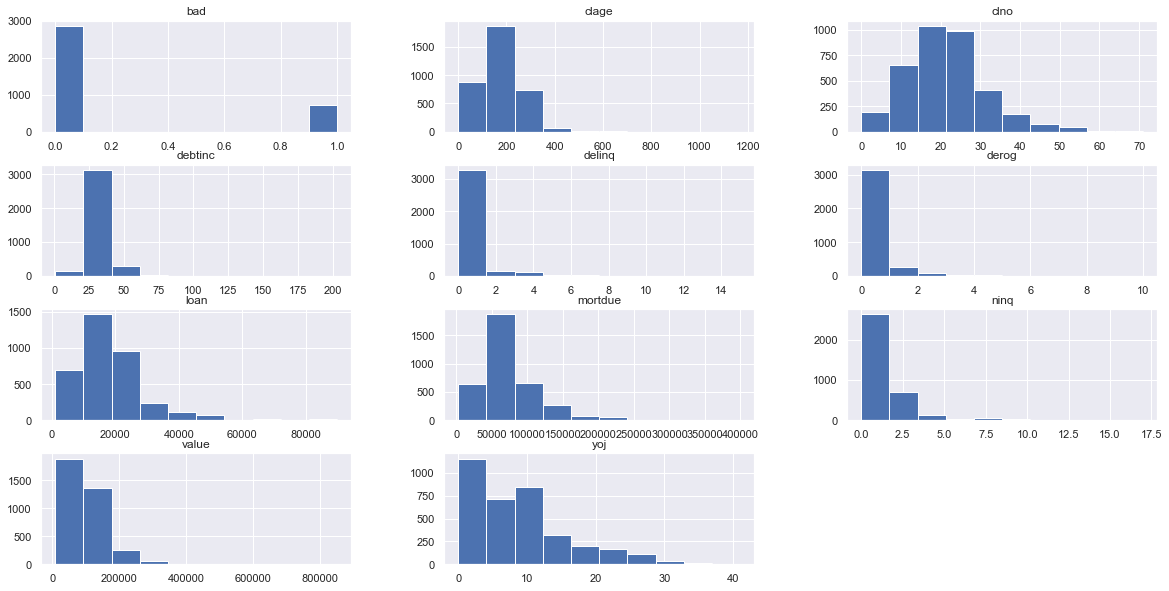

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline
data.hist(figsize=(20,10))

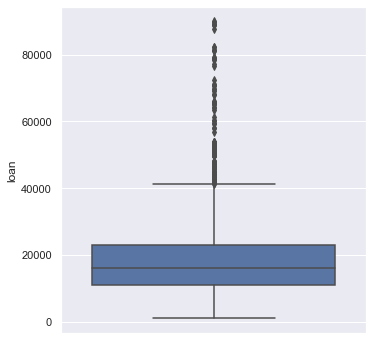

In [75]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
fig=sns.boxplot(x='loan', data=data, orient='v')

In [25]:
# One-hot encode
Encod_data = pd.get_dummies(data) #kategorik verileri sayısal veriye dönüştürme



In [45]:
numerical_cols = [cname for cname in data.columns if
                 data[cname].dtype in ['float']]
num = data[numerical_cols]
num.columns

Index(['mortdue', 'value', 'yoj', 'derog', 'delinq', 'clage', 'ninq', 'clno',
       'debtinc'],
      dtype='object')

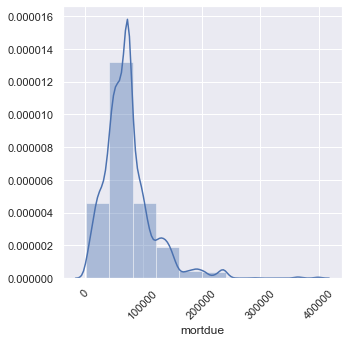

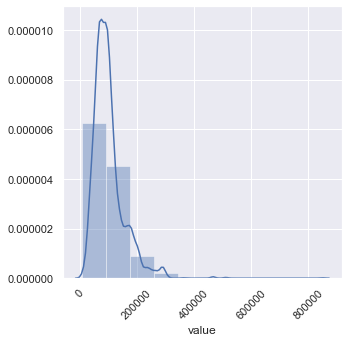

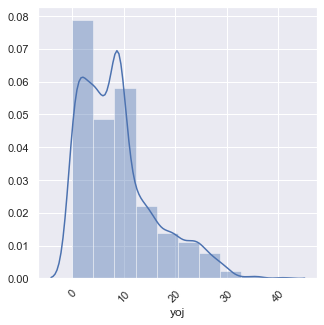

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

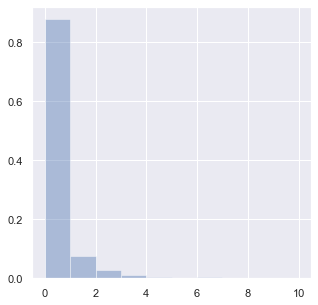

In [46]:
sns.set( rc = {'figure.figsize': (5, 5)})
fnum = ['mortdue', 'value', 'yoj', 'derog', 'delinq', 'clage', 'ninq', 'clno',
       'debtinc']

for col in fnum:
    plt.figure()
    x = num[col]
    sns.distplot(x, bins=10)
    plt.xticks(rotation=45)
    plt.show()

In [21]:
data.corr()

,bad,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
bad,1.000000,-0.026184,-0.025103,-0.031318,-0.050937,0.235700,0.281008,-0.090830,0.109951,-0.012602,0.251064
loan,-0.026184,1.000000,0.282651,0.379027,0.098801,-0.024812,-0.045501,0.064738,0.054942,0.097961,0.157596
mortdue,-0.025103,0.282651,1.000000,0.867368,-0.092880,-0.049734,-0.041545,0.132383,0.020796,0.343742,0.194930
value,-0.031318,0.379027,0.867368,1.000000,-0.003837,-0.055510,-0.066153,0.194847,-0.021380,0.234563,0.138076
yoj,-0.050937,0.098801,-0.092880,-0.003837,1.000000,-0.054276,0.043922,0.222843,-0.049494,0.001370,-0.047849
derog,0.235700,-0.024812,-0.049734,-0.055510,-0.054276,1.000000,0.167600,-0.059206,0.153468,0.059943,0.063426
delinq,0.281008,-0.045501,-0.041545,-0.066153,0.043922,0.167600,1.000000,0.039487,0.013890,0.099542,0.066169
clage,-0.090830,0.064738,0.132383,0.194847,0.222843,-0.059206,0.039487,1.000000,-0.083368,0.184581,-0.046713
ninq,0.109951,0.054942,0.020796,-0.021380,-0.049494,0.153468,0.013890,-0.083368,1.000000,0.081600,0.152820
clno,-0.012602,0.097961,0.343742,0.234563,0.001370,0.059943,0.099542,0.184581,0.081600,1.000000,0.155147


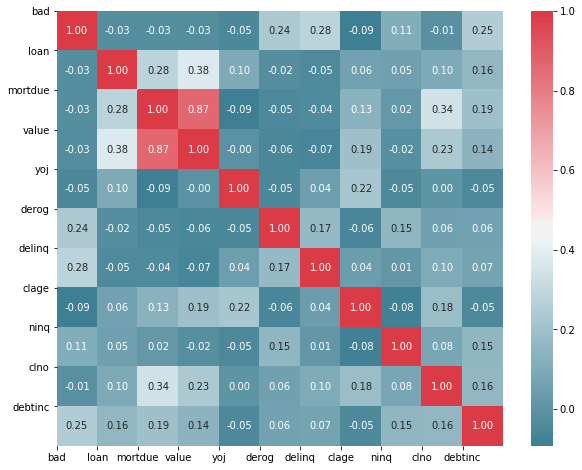

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = data.corr()
fig, ax = plt.subplots(figsize=(10,8))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

In [ ]:
Burada korelasyon haritası çıkardık.

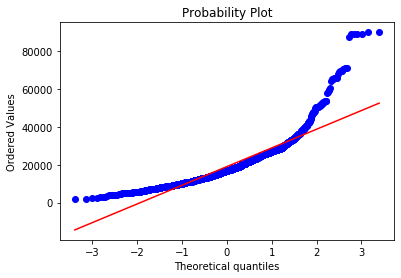

In [47]:
measurements = np.random.normal(loc = 20, scale = 5, size=100)   
stats.probplot(data["loan"], dist="norm", plot=pylab)
pylab.show()

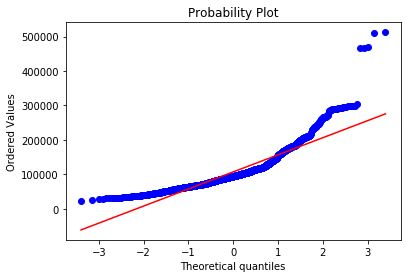

In [41]:
import numpy as np 
import pylab 
import scipy.stats as stats

measurements = np.random.normal(loc = 20, scale = 5, size=100)   
stats.probplot(data["value"], dist="norm", plot=pylab)
pylab.show()

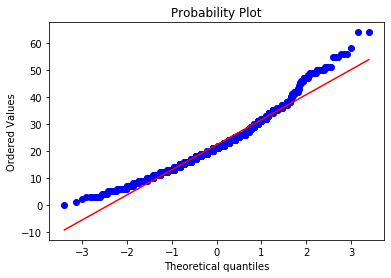

In [43]:
measurements = np.random.normal(loc = 20, scale = 5, size=100)   
stats.probplot(data["clno"], dist="norm", plot=pylab)
pylab.show()

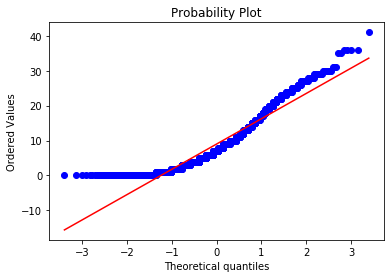

In [44]:
measurements = np.random.normal(loc = 20, scale = 5, size=100)   
stats.probplot(data["yoj"], dist="norm", plot=pylab)
pylab.show()

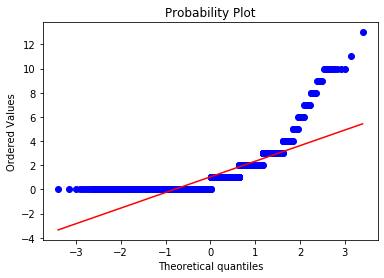

In [45]:
measurements = np.random.normal(loc = 20, scale = 5, size=100)   
stats.probplot(data["ninq"], dist="norm", plot=pylab)
pylab.show()

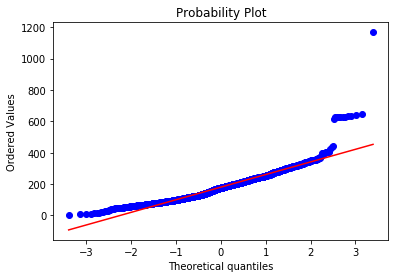

In [46]:
measurements = np.random.normal(loc = 20, scale = 5, size=100)   
stats.probplot(data["clage"], dist="norm", plot=pylab)
pylab.show()

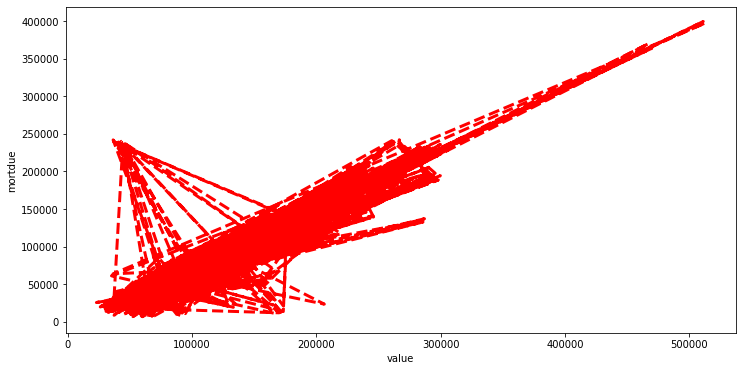

In [68]:
plt.figure(figsize=(12,6))

plt.plot(data.value,data.mortdue,color="r",linewidth=3,linestyle="--")

plt.xlabel("value")

plt.ylabel("mortdue")

plt.show()

In [31]:
class preprocessing:  #part of transformation,standardization,normalization
        def init(self)    
    def cleaning():   
    def encoding():         
    def fillna():       
    def dummy_encoding():        
    def splitting():       
    def outlier():       
    def scaling():

In [78]:
#encoding  #As many of the Machine Learning models takes only the numerical values as input so we have to convert categorical columns to numeric Dummy variable turns categorical variables into a series of 0 and 1, making them much easier to compare
data = pd.get_dummies(data, columns=['reason','job'])
data

,bad,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc,reason_DebtCon,reason_HomeImp,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self
0,0,81200,18834.000000,108355.000000,28.000000,0.0,0.0,139.14,0.0,14.0,34.042000,0,1,0,0,1,0,0,0
1,0,12600,103960.000000,127384.000000,2.000000,0.0,0.0,129.02,0.0,25.0,34.479000,1,0,0,0,1,0,0,0
2,0,18000,46865.000000,61266.000000,5.000000,0.0,0.0,102.59,2.0,9.0,26.354000,1,0,0,0,1,0,0,0
3,0,10300,57676.000000,71027.000000,19.000000,0.0,0.0,157.52,1.0,11.0,33.992000,1,0,0,0,1,0,0,0
4,0,9400,56508.000000,78358.000000,17.000000,0.0,0.0,141.93,0.0,11.0,32.327000,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3571,1,8400,31800.000000,72000.000000,8.832644,0.0,2.0,187.27,1.0,21.0,33.831737,1,0,0,0,0,0,0,1
3572,1,21600,154991.000000,101076.922759,8.832644,2.0,4.0,165.60,0.0,43.0,38.015000,1,0,0,0,0,0,0,1
3573,1,24000,35000.000000,101076.922759,3.000000,1.0,0.0,177.50,0.0,16.0,33.831737,1,0,0,0,0,0,0,1
3574,1,10000,74013.907992,25010.000000,5.000000,0.0,3.0,326.13,4.0,17.0,33.831737,0,1,0,0,0,0,0,1


In [2]:
stats.describe(data.loan)

NameError: name 'stats' is not defined

In [115]:
stats.describe(data.debtinc)

DescribeResult(nobs=2018, minmax=(4.03, 144.189), mean=34.10582854311199, variance=71.20678563047889, skewness=2.787878715380587, kurtosis=34.3528803861387)

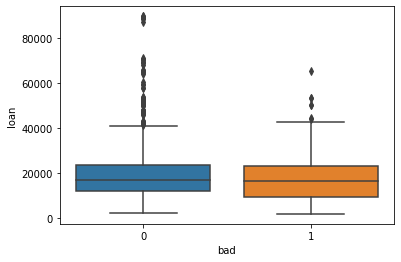

In [124]:
import seaborn as sns
sns.boxplot(x="bad", y="loan",data=data)

In [107]:
shapiro(data.loan)
#H0: loan değişkeni normal dağılımdan gelmektedir.
#H1: loan değişkeni normal dağılımdan gelmemektedir.

(0.8360166549682617, 1.9721874586907475e-41)

In [108]:
alpha = 0.05
if p > alpha:
    print('Loan Normal (Gaussian) Dağılımdan gelmektedir (Fail to Reject H0)')
else:
    print('Loan Normal (Gaussian) Dağılımdan gelmemektedir (reject H0)')

Loan Normal (Gaussian) Dağılımdan gelmemektedir (reject H0)


In [113]:
shapiro(data.debtinc)
#H0: Debtinc değişkeni normal dağılımdan gelmektedir.
#H1: Debtinc değişkeni normal dağılımdan gelmemektedir.


(0.8244601488113403, 1.8707334498736308e-42)

In [111]:
alpha = 0.05
if p > alpha:
    print('Debtinc Normal (Gaussian) Dağılımdan gelmektedir (Fail to Reject H0)')
else:
    print('Debtinc Normal (Gaussian) Dağılımdan gelmemektedir (reject H0)')

Debtinc Normal (Gaussian) Dağılımdan gelmemektedir (reject H0)


In [19]:
import scipy as cipy
cipy.stats.ks_2samp(data.loan,data.debtinc)  #iki değişken aynı dağılımdan gelmemektedir.

Ks_2sampResult(statistic=0.7855145413870246, pvalue=0.0)

In [4]:
from scipy import stats
stats.levene(data.loan,data.debtinc)

NameError: name 'data' is not defined

In [111]:
from scipy import stats
stats.ttest_ind(data.iloc[:,0], data.iloc[:,0],equal_var=True)

Ttest_indResult(statistic=0.0, pvalue=1.0)

In [ ]:
class supervised(model):
    def regression():
    def classification():
        
class unsupervised(model):
    def clustering():

class GridsearchCV(): # results of the model 